### 1-Read Dataset

In [411]:
# import liabary
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [412]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [413]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\Datasets\BankChurners.csv')

In [414]:
# show first 5 row of data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### 2-EDA

In [416]:
# display shape of data
data.shape

(10127, 23)

In [417]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [418]:
# display columns name
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [419]:
# check missing values
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [420]:
# check duplicated
data.duplicated().sum()

0

In [421]:
# drop last 2 column from data
df=data.iloc[:,:-2]

In [422]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [423]:
# show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [424]:
# drop non important column 0 to 8
df.drop(data.iloc[: , :9],axis=1,inplace=True)

In [425]:
df.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [426]:
# show maximum value in columns
np.max(df,axis=0)

Months_on_book                 56.000
Total_Relationship_Count        6.000
Months_Inactive_12_mon          6.000
Contacts_Count_12_mon           6.000
Credit_Limit                34516.000
Total_Revolving_Bal          2517.000
Avg_Open_To_Buy             34516.000
Total_Amt_Chng_Q4_Q1            3.397
Total_Trans_Amt             18484.000
Total_Trans_Ct                139.000
Total_Ct_Chng_Q4_Q1             3.714
Avg_Utilization_Ratio           0.999
dtype: float64

In [427]:
# show miximum value in columns
np.min(df,axis=0)

Months_on_book                13.0
Total_Relationship_Count       1.0
Months_Inactive_12_mon         0.0
Contacts_Count_12_mon          0.0
Credit_Limit                1438.3
Total_Revolving_Bal            0.0
Avg_Open_To_Buy                3.0
Total_Amt_Chng_Q4_Q1           0.0
Total_Trans_Amt              510.0
Total_Trans_Ct                10.0
Total_Ct_Chng_Q4_Q1            0.0
Avg_Utilization_Ratio          0.0
dtype: float64

In [428]:
cols=df.columns

In [429]:
# scalling data
from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()
df=Scaler.fit_transform(df)

In [430]:
df=pd.DataFrame(df,columns=cols)

In [431]:
df.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
4,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000


### Build Model

In [433]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#silhouette_score
scores=[]
silhouette_s=[]
k_range=range(2,10)
for k in k_range:
    km=KMeans(n_clusters=k,random_state=42)
    y_pred=km.fit_predict(df)
    scores.append(km.inertia_)
    silhouette_s.append(silhouette_score(df,y_pred))
    print('k = ',k ,'  ',km.inertia_)
    print('silhouette_score : %0.4f'%silhouette_score(df,y_pred))

k =  2    4700.7532492184055
silhouette_score : 0.2100
k =  3    3767.032639919911
silhouette_score : 0.2322
k =  4    3469.53480138362
silhouette_score : 0.1773
k =  5    3108.7540664018497
silhouette_score : 0.1773
k =  6    2870.9600754368166
silhouette_score : 0.1833
k =  7    2741.010389488286
silhouette_score : 0.1779
k =  8    2642.7439299129423
silhouette_score : 0.1632
k =  9    2486.7713801248346
silhouette_score : 0.1557


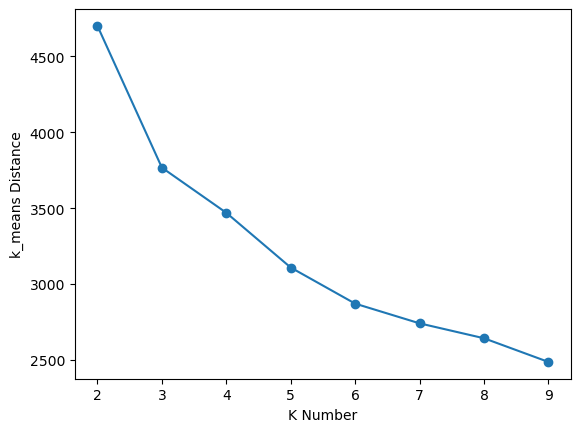

In [434]:
# plot Elbow
plt.plot(k_range,scores,marker='o')
plt.xlabel('K Number')
plt.ylabel('k_means Distance')
plt.show()

In [435]:
# k=3
km=KMeans(n_clusters=3,random_state=42)
km.fit(df)
y_pred=km.predict(df)

In [436]:
y_pred[:10]

array([2, 2, 2, 0, 2, 0, 1, 1, 1, 0])

In [437]:
# add column cluter in fact data
data['Cluster']=y_pred

In [467]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,2


In [439]:
# displau centers
km.cluster_centers_

array([[0.53058575, 0.58449704, 0.38468113, 0.4       , 0.08948231,
        0.67093069, 0.07841789, 0.22676036, 0.20579084, 0.42716389,
        0.19725454, 0.49695336],
       [0.5361677 , 0.50501408, 0.38328638, 0.40685446, 0.73420846,
        0.51246431, 0.70788846, 0.22573771, 0.29805882, 0.47120428,
        0.1923927 , 0.05662733],
       [0.53569151, 0.55965874, 0.40244769, 0.42474101, 0.13574002,
        0.1119045 , 0.16352111, 0.21789919, 0.18940018, 0.3974746 ,
        0.18295129, 0.05075154]])

In [469]:
data0=data[data.Cluster==0]
data1=data[data.Cluster==1]
data2=data[data.Cluster==2]

In [473]:
data0.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994,0
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970,0
10,708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,1467,5281.0,0.831,1201,42,0.680,0.217,0.000191,0.99981,0
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,1587,7508.0,1.433,1314,26,1.364,0.174,0.000198,0.99980,0


In [475]:
data1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988,1
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991,1
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996,1
16,709967358,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,...,2362,28005.0,1.708,1671,27,0.929,0.078,0.000236,0.99976,1
20,806165208,Existing Customer,47,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,...,1800,19179.0,0.906,1178,27,0.929,0.086,0.000057,0.99994,1


In [477]:
data2.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,2
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,2
12,710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,...,0,11751.0,3.397,1539,17,3.250,0.000,0.000048,0.99995,2


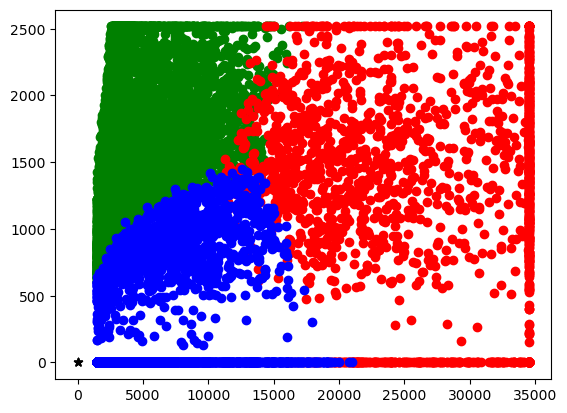

In [497]:
plt.scatter(data0['Credit_Limit'],data0['Total_Revolving_Bal'],color='g')
plt.scatter(data1['Credit_Limit'],data1['Total_Revolving_Bal'],color='r')
plt.scatter(data2['Credit_Limit'],data2['Total_Revolving_Bal'],color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')